In [1]:
import dtale
import numpy as np
import pandas as pd

import plotly.express as px

In [2]:
dataset_test = pd.read_csv("testReg.csv", sep = ',')

In [3]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18657 entries, 0 to 18656
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      18657 non-null  int64  
 1   V1      18657 non-null  float64
 2   V2      18657 non-null  float64
 3   V3      18657 non-null  int64  
 4   V4      18657 non-null  float64
 5   V5      18657 non-null  float64
 6   V6      18657 non-null  float64
 7   V7      18657 non-null  float64
 8   V8      18657 non-null  float64
 9   V9      18657 non-null  float64
 10  V10     18657 non-null  float64
 11  V11     18657 non-null  float64
 12  V12     18657 non-null  float64
 13  V13     18657 non-null  float64
 14  V14     18657 non-null  float64
 15  V15     18657 non-null  float64
 16  V16     18657 non-null  float64
 17  V17     18657 non-null  float64
 18  V18     18657 non-null  float64
 19  V19     18657 non-null  float64
 20  V20     18657 non-null  float64
 21  V21     18657 non-null  float64
 22

In [4]:
dataset_test.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
0,5972,35.74170,0.86615,0,1.44450,-13.87834,-9.57602,5.89475,-4.46036,-10.60501,...,10.78210,-183.63792,131.18868,37.68626,-4.48926,10.98139,-48.14549,-7.27992,-54.52826,4.81414
1,57116,35.31664,-0.47799,0,-12.27958,-29.32847,-2.38610,-7.27386,-1.87712,-3.74953,...,53.92478,-238.77713,134.28149,81.19403,-4.81669,106.00178,3.34940,2.72328,156.94894,-8.44873
2,29076,43.25032,-6.31920,0,-2.56469,-7.59368,2.12862,23.29535,-0.34225,4.48761,...,40.95711,-269.59803,69.88747,29.65701,-0.12854,106.92919,-62.86550,30.12278,24.39843,-10.68316
3,83358,44.94220,-4.12303,0,-15.79205,7.15794,1.46007,-3.38280,-8.48270,12.69732,...,0.81574,-243.09497,24.20334,-10.02719,19.25667,66.15602,-64.78646,9.09148,11.46055,-7.12136
4,84664,50.40813,-1.52061,0,-10.10142,-17.74876,-5.96768,-29.94136,-11.84237,5.90144,...,-3.58634,-61.67109,47.53814,139.04916,6.85904,-57.09356,-49.57683,-6.61453,22.55497,-4.39272


In [5]:
def get_significant_correlations(df, threshold):
    # Calcula la matriz de correlación de Pearson
    corr_matrix = df.corr()

    # Obtiene las columnas del dataframe original
    columns = df.columns

    # Crea una lista vacía para almacenar las correlaciones significativas
    significant_corr = []

    # Itera sobre las filas y columnas de la matriz de correlación
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            # Obtiene el valor de correlación entre las dos variables
            corr = corr_matrix.iloc[i, j]
            
            # Verifica si el valor de correlación supera el threshold y lo agrega a la lista de correlaciones significativas
            if abs(corr) >= threshold or abs(corr) <= (threshold * -1)  :
                significant_corr.append({'Variable 1': columns[i],
                                         'Variable 2': columns[j],
                                         'Correlation': corr})

    # Crea un dataframe a partir de la lista de correlaciones significativas
    significant_corr_df = pd.DataFrame(significant_corr)

    return significant_corr_df

# Variables con correlaciones más significativas
threshold = 0.7
significant_correlations_test = get_significant_correlations(dataset_test, threshold)
print(significant_correlations_test)

  Variable 1 Variable 2  Correlation
0        V16        V18     0.803843
1        V16        V20     0.740101
2        V16        V22     0.701206
3        V16        V23     0.845987
4        V18        V22     0.723881
5        V18        V23     0.856287
6        V20        V22     0.872896
7        V20        V23     0.724368
8        V22        V23     0.730965


In [6]:
min(dataset_test.ID), max(dataset_test.ID),  len(dataset_test.ID.unique())

(20, 96436, 18657)

In [8]:
#dataset.Y.value_counts()

In [11]:
#min(dataset.Y), max(dataset.Y), len(dataset.Y.unique())

(1926, 2014, 74)

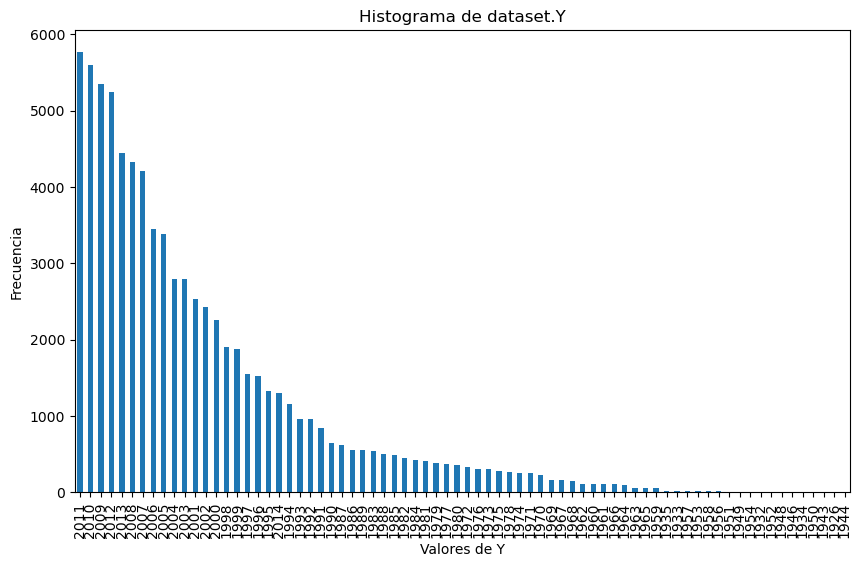

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
dataset.Y.value_counts().plot(kind='bar')

plt.xlabel('Valores de Y')
plt.ylabel('Frecuencia')
plt.title('Histograma de dataset.Y')

plt.show()


- Las redes neuronales sn susceptibles a la correlación entre variables?
- Estandarizar las variables
- No se requiere codificar variables categóricas porque no hay
- No hay datos faltantes
- Hay desbalanceo en el valor a predecir pues hay miles de muestras más para años recientes que para los primeros años.  Las redes neuronales son vulnerables al desbalanceo?
- Aplicar reducción de dimensionalidad?

In [9]:
dtale.show(dataset_test, open_browser=True)